In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import matplotlib as mpl
print(mpl.matplotlib_fname())
print(mpl.get_cachedir())
mpl.rcParams['font.family'] = 'NanumGothic'

C:\Users\autum\anaconda3\Lib\site-packages\matplotlib\mpl-data\matplotlibrc
C:\Users\autum\.matplotlib


In [3]:
file = r"C:\Users\autum\OneDrive\바탕 화면\2-2\통계적데이터분석\data\Student Attitude and Behavior.csv"
data = pd.read_csv(file)
data.head()

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social media & video,Travelling Time,Stress Level,Financial Status,part-time job
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


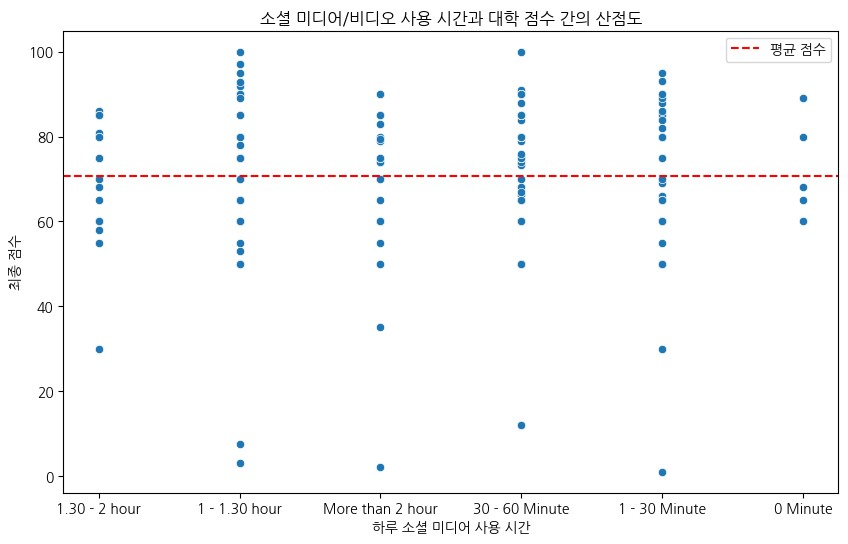

In [4]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data, x = "social media & video", y = "college mark")
plt.title("소셜 미디어/비디오 사용 시간과 대학 점수 간의 산점도")
plt.xlabel("하루 소셜 미디어 사용 시간")
plt.ylabel("최종 점수")
plt.axhline(y=data["college mark"].mean(), color='r', linestyle='--', label='평균 점수')
plt.legend()
plt.show()

In [5]:
# social media & videos 행 숫자로 변경
def convert_hours(time):
    time = time.strip()
    if "0 Minute" == time :
        return 0
    elif "1 - 30 Minute" == time:
        return 0.25
    elif "30 - 60 Minute" == time:
        return 0.75
    elif "1 - 1.30 hour" == time:
        return 1.25
    elif "1.30 - 2 hour" == time:
        return 1.75
    elif "More than 2 hour" == time:
        return 2.25
        
data["social media & video hours"] = data["social media & video"].apply(convert_hours)

#1을 기준으로 1시간 이하 사용, 1시간 이상 사용으로 그룹화 
median = 1
low_use = data[data["social media & video hours"] <= median]["college mark"]
high_use = data[data["social media & video hours"] > median]["college mark"]

In [6]:
# normal
from scipy.stats import shapiro

print(shapiro(low_use))
print(shapiro(high_use))
# 두 그룹 모두 p < 0.05 이므로 '데이터가 정규성을 따른다'는 귀무가설 기각
# 즉, 정규성을 만족하지 않는다.

ShapiroResult(statistic=0.9056743622906039, pvalue=3.5315274108368077e-07)
ShapiroResult(statistic=0.84883871982296, pvalue=1.98985138045109e-09)


In [7]:
from scipy.stats import bartlett

stat, p = bartlett(low_use, high_use)
print(stat, p) 
#p > 0.05 이므로 '분산이 동일하다'는 귀무가설 기각하지 않음
#즉, 분산이 동일하다고 볼 수 있음

0.8307362852305175 0.3620597108450082


In [10]:
from scipy.stats import kruskal

stat, p = kruskal(low_use, high_use)
print(stat, p)
# P> 0.05 이상 이므로 '두 그룹의 중앙값은 같다'는 귀무가설 기각하지 못함
# 즉, '소셜미디어와 비디오의 사용 시간은 대학 성적과 관계가 없다'는 결론 도출

0.39146744991749033 0.5315290547250976
